<a href="https://colab.research.google.com/github/simonetrav/breed-class/blob/master/breed_clas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#file unzippati caricati su google drive
#!unzip '/content/drive/My Drive/breed_class/dog-breed-identification.zip' -d 'drive/My Drive/breed_class'

In [1]:
#importo tensorflow su colab
import tensorflow as tf
import tensorflow_hub as hub
print(tf.__version__)
print(hub.__version__)

print('GPU', 'available yes' if tf.config.list_physical_devices('GPU') else 'not available')

2.2.0-rc4
0.8.0
GPU available yes


In [0]:
#trasformiamo le immagini in tensori
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import os

In [0]:
labels_csv = pd.read_csv('/content/drive/My Drive/breed_class/labels.csv')

In [0]:
print(labels_csv.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     a9ddd222a196bfdf07f52b227b27bf1d  scottish_deerhound
freq                                   1                 126


In [0]:
 labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

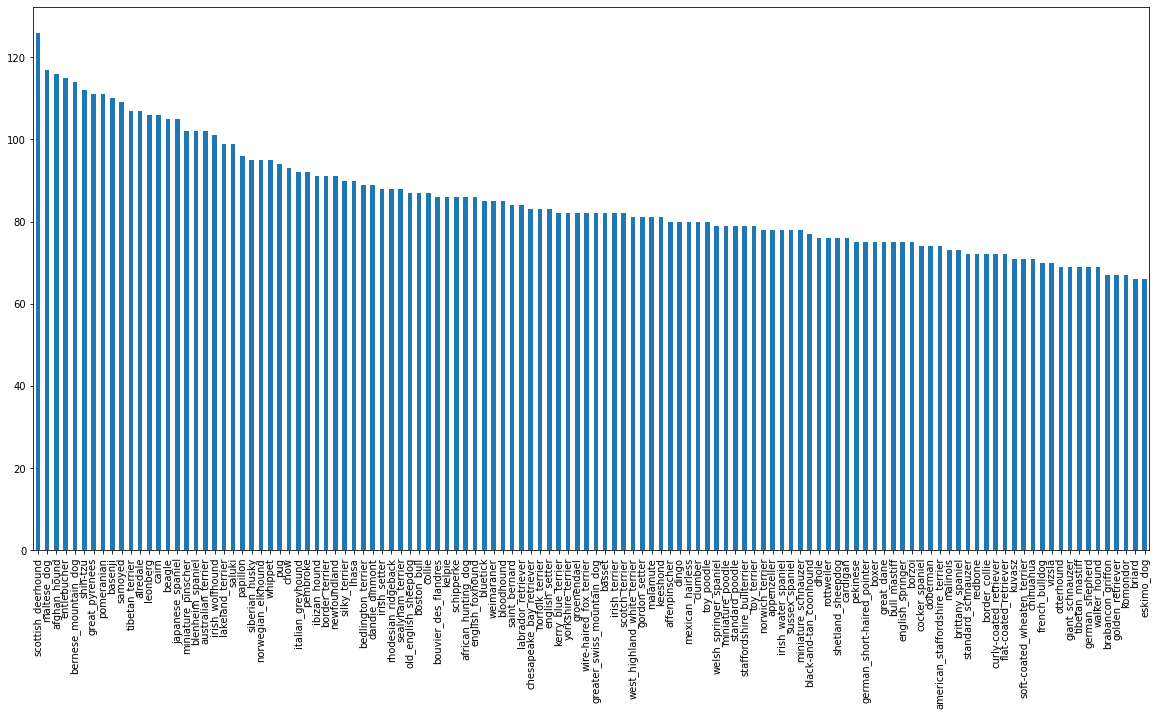

In [0]:
#quante immagini ci sono di ogni razza?
labels_csv.breed.value_counts().plot.bar(figsize=(20,10))

In [0]:
labels_csv.breed.value_counts().median()

82.0

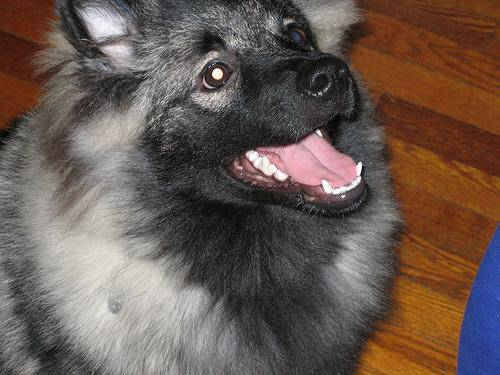

In [0]:
from IPython.display import Image
Image('/content/drive/My Drive/breed_class/train/e36f90b1dd7921dceb536c79989fe69f.jpg')

In [0]:
#creo lista immagini e percorsi

filenames = ['drive/My Drive/breed_class/train/' + fname + '.jpg' for fname in labels_csv['id']]

In [0]:
filenames[:10]

['drive/My Drive/breed_class/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/breed_class/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/breed_class/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/breed_class/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/breed_class/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/breed_class/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/breed_class/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/breed_class/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/breed_class/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/breed_class/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [12]:
#controllo per vedere se filenames e numero immagini sono coerenti
import os
num_img= os.listdir('drive/My Drive/breed_class/train/')

if  len(num_img) == len(filenames):
  print('tutto ok')
else:
  print(f'non hanno stesso numero, le immagini sono {len(num_img)} mentre filenames è {len(filenames)}')

tutto ok


In [13]:
len(num_img)

10222

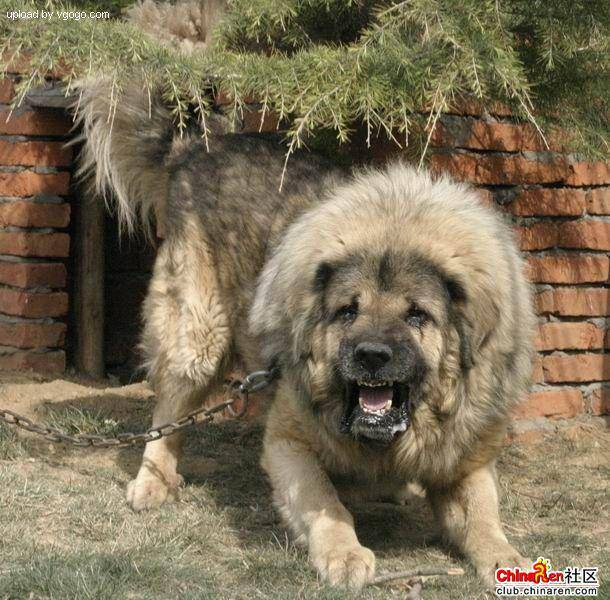

In [0]:
Image(filenames[9000])

In [14]:
labels=labels_csv.breed.to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [15]:
# controlliamo se numero labels è uguale a quello di filenames
if len(labels) == len(filenames):
  print('tutto ok')
else:
  print(f'non hanno stesso numero, le labels sono {len(labels)} mentre filenames è {len(filenames)}')

tutto ok


In [16]:
# troviamo valori unici di labels

unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [17]:
# trasformiamo array categorico in booleano

bool_labels = [label == unique_breeds for label in labels]
len(bool_labels)

10222

In [0]:
#trasformiamo da booleano a intero
num_labels= [label.astype(int) for label in bool_labels]
num_labels

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 

In [0]:
# creiamo un set di validazione e un piccolo batch per addestramento
X = filenames
y = bool_labels

In [0]:
NUM_IMG = 1000 #@param {type:'slider',min:1000,max:10000,step:1000}

In [0]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMG],
                                               y[:NUM_IMG],
                                               test_size=0.2,
                                               random_state=42)
len(X_train),len(X_val)

(800, 200)

In [0]:
#preprocessare immagini
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [0]:
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [0]:
IMG_SIZE=224
def process_image (image_path, img_size=IMG_SIZE):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image,channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])

  return image

In [0]:
def get_image_label (image_path, label):
  image = process_image(image_path)
  return image,label

In [0]:
(process_image(X[42]), y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [0]:
get_image_label(X[42],y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [0]:
BATCH_SIZE = 32
def create_data_batches(X,y=None, batch_size=BATCH_SIZE, valid_data=False, test_data = False):
  if test_data:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  elif valid_data:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)

  else:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))

    data = data.map(get_image_label)

    data_batch = data.batch(BATCH_SIZE)

  return data_batch

In [0]:
train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val,y_val, valid_data=True)

In [0]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [0]:
def show_25_images (images, labels):
  plt.figure(figsize=(10,10))

  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])



In [0]:
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels)

(32, 32)

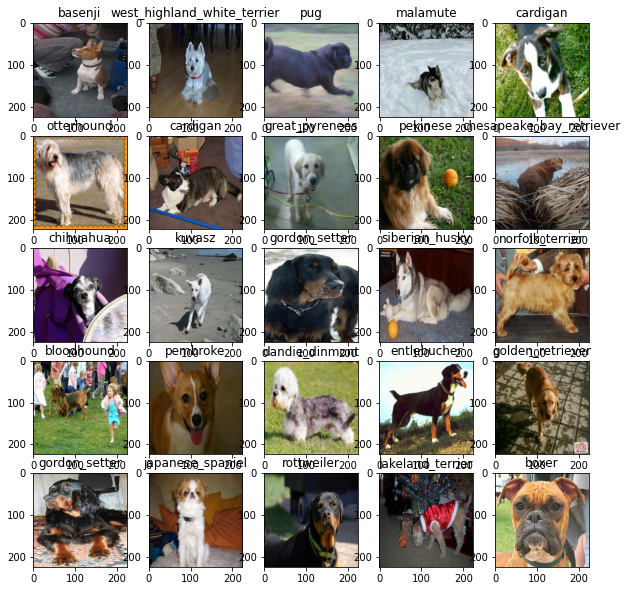

In [0]:
show_25_images(train_images,train_labels)

In [0]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]
OUTPUT_SHAPE = len(unique_breeds)
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4'

In [0]:
#funzione che crea un modello keras

def create_model (input_shape=INPUT_SHAPE, otuput_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print ('il modello è', MODEL_URL)
  model = tf.keras.Sequential([
                               hub.KerasLayer(MODEL_URL),
                               tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                     activation='softmax'),
  ])
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )
  model.build(INPUT_SHAPE)
  return model

In [0]:
model = create_model()
model.summary()

il modello è https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [0]:
#creiamo dei callabcks
%load_ext tensorboard

import datetime

#creiamo funzione per fare tensorboard callback

def create_tf_callback ():
  logdir = os.path.join('/content/drive/My Drive/breed_class/logs',
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  return tf.keras.callbacks.TensorBoard(logdir)

In [0]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience = 3)

In [0]:
#addestriamo il modello
NUM_EPOCHS=100 #@param {type:'slider', min:10, max:1000}

In [0]:
#funzione epr addestrare modello

def train_model ():
  
  model = create_model()
  tensorboard = create_tf_callback()
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data = val_data,
            validation_freq = 1,
            callbacks = [tensorboard,early_stopping])
  return model

In [0]:
#model = train_model()
model = tf.keras.models.load_model('/content/drive/My Drive/breed_class/models/20200505-09251588670716-1000-images-Adam.h5',
                                      custom_objects={'KerasLayer':hub.KerasLayer})

In [0]:
# controlliamo i log di tensorboard

%tensorboard --logdir /content/drive/My\ Drive/breed_class/logs

<IPython.core.display.Javascript object>

In [0]:
predictions = model.predict(val_data, verbose=0)
predictions

array([[4.3443847e-04, 1.4773490e-05, 7.7165145e-04, ..., 2.3577011e-05,
        2.5157974e-06, 7.1388343e-04],
       [5.9817182e-03, 1.1179107e-03, 6.9936320e-02, ..., 1.1463945e-03,
        3.5322974e-03, 8.7551720e-04],
       [2.7378734e-05, 5.5071294e-05, 1.7214779e-04, ..., 1.2107363e-04,
        5.8055657e-04, 8.8313792e-04],
       ...,
       [5.0803352e-05, 1.1175155e-04, 1.3947059e-04, ..., 4.1597546e-06,
        8.8365414e-05, 3.7314603e-05],
       [9.7103656e-04, 1.0472237e-04, 8.6220185e-05, ..., 8.0060745e-05,
        4.9165727e-05, 2.6020890e-03],
       [6.5327645e-04, 6.6598674e-05, 8.5898722e-04, ..., 6.0524740e-03,
        4.6702991e-03, 4.4087562e-04]], dtype=float32)

In [0]:
def predict_label (prediction_probabilities):

  return unique_breeds[np.argmax(prediction_probabilities)]


In [0]:
pred_label = predict_label (predictions[77])
pred_label

'schipperke'

In [0]:
#val_data è in batch, dobbiamo spacchettarlo
def unbatchify (data):
  images_ = []
  labels_ = []
  for i,l in data.unbatch().as_numpy_iterator():
    images_.append(i)
    labels_.append(unique_breeds[np.argmax(l)])
  return images_, labels_

In [0]:
val_images, val_labels = unbatchify(val_data)
val_images[0],val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [0]:
val_labels[77]

'groenendael'

In [0]:
val_images[1]

array([[[0.96018916, 0.97587544, 0.979797  ],
        [0.9617217 , 0.977408  , 0.98132956],
        [0.9651424 , 0.9808287 , 0.9847503 ],
        ...,
        [0.95294124, 0.9725491 , 0.9960785 ],
        [0.94906336, 0.9686712 , 0.9922006 ],
        [0.94802153, 0.9676294 , 0.9911588 ]],

       [[0.97587544, 0.9915617 , 0.9954833 ],
        [0.9765078 , 0.99219406, 0.9961156 ],
        [0.9802049 , 0.99589115, 0.99981266],
        ...,
        [0.96018916, 0.979797  , 1.        ],
        [0.9563113 , 0.9759191 , 0.9994114 ],
        [0.95366776, 0.9732756 , 0.99680495]],

       [[0.9686275 , 0.9843138 , 0.98823535],
        [0.9689829 , 0.98466915, 0.9885907 ],
        [0.972765  , 0.9884513 , 0.9923729 ],
        ...,
        [0.9677083 , 0.98731613, 1.        ],
        [0.9650211 , 0.9846289 , 1.        ],
        [0.9610995 , 0.98070735, 0.9960785 ]],

       ...,

       [[0.29487073, 0.40404442, 0.24774945],
        [0.1316065 , 0.22889124, 0.11186215],
        [0.19447322, 0

In [0]:
def plot_pred (prediction_probabilities, labels, images, n=1):

  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  pred_label = predict_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == true_label:
    color= 'green'
  else:
    color='red'

  plt.title ('{} {:2.0f}% {}'.format(pred_label, 
                                     np.max(pred_prob)*100, 
                                     true_label),
             color=color)

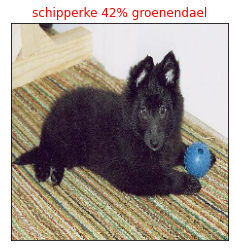

In [0]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

In [0]:
#funzione per visualizzare le prime 10 classi predette
def plot_pred_conf (prediction_probabilities, labels, n=1):
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  pred_label = predict_label(pred_prob)

  top_10_pred_ind = pred_prob.argsort()[-10:][::-1]

  top_10_pred_val = pred_prob[top_10_pred_ind]

  top_10_pred_labels = unique_breeds[top_10_pred_ind]

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                      top_10_pred_val,
                      color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation='vertical')
  
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==true_label)].set_color('green')
  else:
    pass

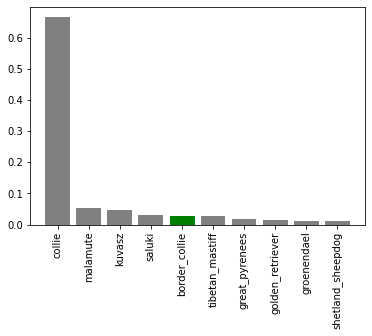

In [0]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels, 
               n=9)

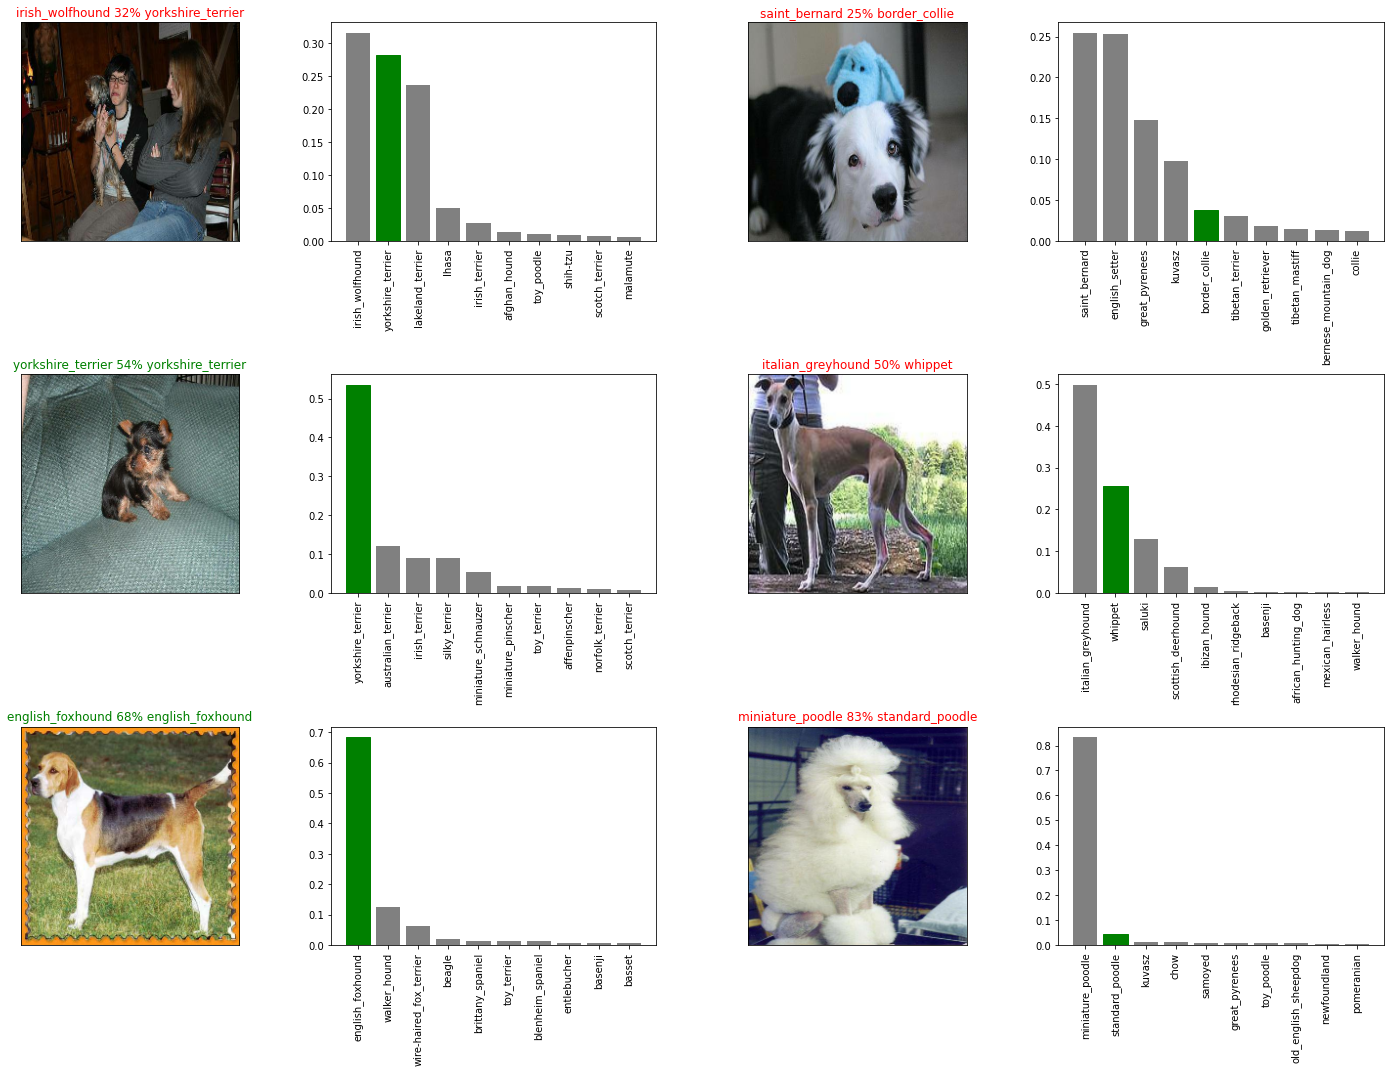

In [0]:
i_multiplier = 10
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels= val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
            labels= val_labels,
            n=i+i_multiplier)
  
plt.tight_layout(h_pad=1.0)
plt.show()

In [0]:
def conf_matr (num_clas,predictions,gr_tr):
  matrix= np.zeros((num_clas,num_clas))
  preds=[predict_label(predictions[i]) for i in range(len(predictions))]

  for i in range(len(preds)):
    if preds[i] == gr_tr[i]:
      index=unique_breeds.tolist().index(preds[i])
      matrix[index,index]+=1
    else:
      index2=unique_breeds.tolist().index(preds[i])
      index3=unique_breeds.tolist().index(gr_tr[i])
      matrix[index2,index3]+=1

  return pd.DataFrame(matrix)


In [0]:
conf_matr(120,predictions,val_labels)

In [0]:
def save_model (model, suffix=None):
  modeldir = os.path.join(r'/content/drive/My Drive/breed_class/models', datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))
  model_path = modeldir + '-' + suffix + '.h5'
  model.save(model_path)
  return model_path

In [0]:
def load_model (model_path):

  model = tf.keras.models.load_model(model_path,
                                      custom_objects={'KerasLayer':hub.KerasLayer})
  return model

In [0]:
save_model(model, suffix='1000-images-Adam')

'/content/drive/My Drive/breed_class/models/20200505-09281588670903-1000-images-Adam.h5'

In [0]:
loaded_model = load_model('/content/drive/My Drive/breed_class/models/20200505-09251588670716-1000-images-Adam.h5')

In [0]:
model.evaluate(val_data)

7/7 [==============================] - 1s 136ms/step - loss: 1.2136 - accuracy: 0.6550


[1.2135955095291138, 0.6549999713897705]

In [0]:
loaded_model.evaluate(val_data)

7/7 [==============================] - 1s 142ms/step - loss: 1.2136 - accuracy: 0.6550


[1.2135955095291138, 0.6549999713897705]

In [0]:
#addestriamo il modello su tutto il dataset
full_data = create_data_batches(X,y)

In [0]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [0]:
full_model = create_model()

il modello è https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [0]:
# aggiungiamo dei callbacks
full_model_tensorboard = create_tf_callback()

In [0]:
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                            patience=3)

In [0]:
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,
                          full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 5411s 17s/step - loss: 1.3458 - accuracy: 0.6646
Epoch 2/100
320/320 [==============================] - 58s 182ms/step - loss: 0.3974 - accuracy: 0.8847
Epoch 3/100
320/320 [==============================] - 58s 183ms/step - loss: 0.2356 - accuracy: 0.9369
Epoch 4/100
320/320 [==============================] - 59s 183ms/step - loss: 0.1537 - accuracy: 0.9629
Epoch 5/100
320/320 [==============================] - 57s 179ms/step - loss: 0.1068 - accuracy: 0.9780
Epoch 6/100
320/320 [==============================] - 59s 184ms/step - loss: 0.0766 - accuracy: 0.9864
Epoch 7/100
320/320 [==============================] - 57s 179ms/step - loss: 0.0579 - accuracy: 0.9917
Epoch 8/100
320/320 [==============================] - 57s 178ms/step - loss: 0.0466 - accuracy: 0.9934
Epoch 9/100
320/320 [==============================] - 58s 182ms/step - loss: 0.0374 - accuracy: 0.9957
Epoch 10/100
320/320 [==============================] - 58s 180m

In [0]:
save_model(full_model, suffix='full_images')

'/content/drive/My Drive/breed_class/models/20200505-11331588678400-full_images.h5'

In [0]:
loaded_full_model = load_model('/content/drive/My Drive/breed_class/models/20200505-11331588678400-full_images.h5')

In [0]:
#predire sul dataset di test
test_path = '/content/drive/My Drive/breed_class/test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

In [8]:
len(test_filenames)

12010

In [0]:
test_data = create_data_batches(test_filenames, test_data=True)

In [0]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [0]:
test_predicitons = loaded_full_model.predict(test_data, verbose = 1)

376/376 [==============================] - 8752s 23s/step


In [0]:
np.savetxt('drive/My Drive/breed_class/preds_array.csv',test_predicitons, delimiter=',')

In [0]:
test_predictions = np.loadtxt ('drive/My Drive/breed_class/preds_array.csv', delimiter = ',')

In [5]:
test_predictions.shape

(12010, 120)

In [0]:
#prepariamo il file per caricarlo su kaggle
preds_df = pd.DataFrame(columns=['id'] + list(unique_breeds))

In [0]:
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]

In [0]:
preds_df['id']= test_ids

In [0]:
preds_df[list(unique_breeds)] = test_predictions

In [0]:
preds_df.to_csv('drive/My Drive/breed_class/submission_1.csv', index = False)

In [0]:
# come funziona il modello con altre foto
custom_path = 'drive/My Drive/breed_class/custom_photos/'
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [0]:
custom_data = create_data_batches(custom_image_paths, test_data=True)

In [0]:
custom_preds = loaded_full_model.predict(custom_data)

In [0]:
custom_preds_label = [predict_label(custom_preds[i]) for i in range(len(custom_preds))]

In [44]:
custom_preds_label

['bernese_mountain_dog', 'german_shepherd', 'boston_bull', 'border_collie']

In [0]:
custom_images = []
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

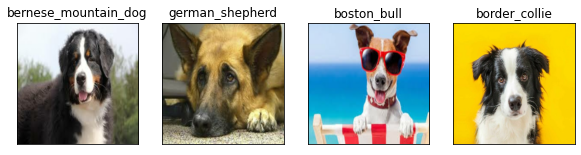

In [51]:
plt.figure(figsize=(10,10))
for i, im in enumerate(custom_images):
  plt.subplot(1,4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_preds_label[i])
  plt.imshow(im)